# Introducing Mechanical Vibrations with a Book Oscillating on a Coffee Mug

## Course Learning Objectives

The primary course objectives are (succinctly) that students will be able to:

- characterize vibrations based on measurements from real and simulated dynamic systems
- design vibrating systems with desired characteristics
- create predictive mathematical and computational models of real vibrating systems

In this notebook, you will get a taste of each of these three using a simple real system we can examine in class. Each class session will follow a similar pattern but with new and more complicated systems as we progress. You will be able to complete each step in the entire modeling-analysis-design iterative loop when the course is over.

## Prerequesites

- Familarity using an interpreted scientific programming language (Python, Matlab, R, etc)
- Basic Python skills will be helpful: how to write a function, assign variables, import things
- Intro dynamics: F=ma, ODEs, energy

## Execution Instructions

Execute code cells by clicking on the cell and pressing the "Run" button in the toolbar or by simultaneously pressing the "Shift" and "Enter" keys on your keyboard.

# Introduction

This notebook introduces a single [degree of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(mechanics) vibratory system: a textbook balancing on a cylindrical coffee mug. The system is implemented as a computational model that you can interact with in order to visualize the free response and compare the computer simulation to a demonstration in the classroom. The video below shows the real system in action:

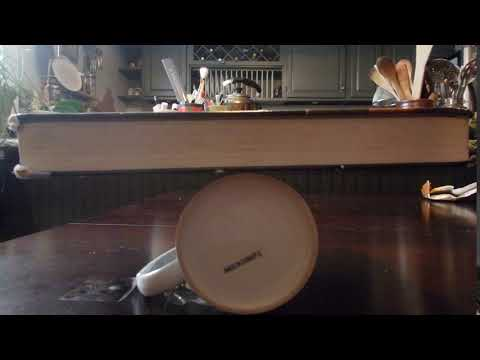

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('B12HbAOKnqI', width=600, height=480)

## What are vibrations?

Here we will study a simple vibratory system. A vibrating mechanical system is typically defined as a collection of rigid and flexible objects that interact in a closed envelope. Thinking about the book and the mug, it will oscillate if initially displaced at a small non-horizontal angle and let go. Note that it oscillates about a horizontal position. This position is called an **equilibrium point**, **equilibrium state**, or **equilibrium configuration** which is a natural position the system comes to when there is no motion. Vibration is formally defined as an **oscillation about an equilibrium** and occurs if there is a moving inertial object which has **restoring forces** acting on it.

Vibrations require:

- inertial object that can move
- restoring forces
- equilibrium configuration

During this class, we will examine and explore many different vibratory systems, such as this simple book on a mug system. We will have some live demos, as we are showing now, but in general we will work with computational representations of systems to experiment and learn about the nature of vibration.

## Python imports and setup

This is boiler plate import code that makes all of the necessary libraries available for use and sets up some display setting for the notebook. In Python, all special functionality comes from importing different Python *modules* and *packages*.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# makes matplotlib plots show up in notebook and be interactive
%matplotlib widget

# Model Description

For the purposes of the introduction we will assume you have come up with a simplified version of the conceptual mechanics that govern the system's motion. In this case there are several assumptions made.

### Exercise

If we want to learn specifically about how the book oscillates on the cup, what might be some good assumptions to make to simplify reality so that we can create a mathematical model?

Here are the main assumptions I started with:

- The book and the cup surfaces are perfectly shaped geometric entities.
- The book rolls without slip on the cup's surface.
- The book is a uniformly dense rectangle that only has planar motion.

The essence of modeling is coming up with appropriate assumptions that let you describe the system in the simplest way such that the model's behavior is sufficient to answer your questions about the system. It is a skill that takes a lot of practice and you will get to practice this a fair amount in this class. A model may be good or it may be bad, depending on what we are hoping to predict. We will check its "goodness" in the analysis section.

Below you will find a pre-determined **free body diagram** that can likely capture the essential vibratory motion of this system.

<img src="balancing-book.svg" alt="image" width="600" />

- $l$: length of the book in meters
- $d$: thickness of the book in meters
- $r$: radius of the cup in meters
- $m$: mass of the book in kilograms
- $h$: height of the mass center above the cup's center plane
- $\theta(t)$: angle of the book in radians

# Objective 1: Numerical Analysis of the Motion

In this section we will make use of a premade **system** to handle the numerical evaluation of the equations of motion. The following cells load this system and name it `sys` so we can make use of it.

In [4]:
from book_balance import BookCupSystem

In [5]:
sys = BookCupSystem()

`sys` is now a new system object that you can interact with. This system has many variables and functions associated with it. You can see what the system has and can do by using the Python dot notation. Type `sys.` and press the tab key to see a list of all the variables and functions that are associated with this system.

## Analysis Step 1: Visualize the System's Configuration

It is often very helpful to visualize a system's configuration. In this case we need a two dimensional drawing similar to the diagram above. The `plot_configuration()` function let's us see a simple visualization.

In [6]:
sys.plot_configuration();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### System constants

One thing that systems have are different constants, for example this system has geometry, such as the book's thickness and length and the cup's radius. The book also has a mass and, in this case, an underlying assumption is that the book is uniformly dense. Note that all of these do not change with time, i.e. they are constant. You can view all of the constants, which are stored in a Python dictionary by typing:

In [7]:
sys.constants

{'d': 0.029, 'l': 0.238, 'r': 0.042, 'm': 1.058, 'g': 9.81}

A Python dictionary maps keys, in this case the constant's names, to values, the numerical values you'd like to assign to the constant. For example the key `'l'`, for "length", is associated with a value `0.029`. An individual constant's value can be accessed by using square brackets:

In [8]:
sys.constants['l']

0.238

You can set the values of the constants as such:

In [9]:
sys.constants['l'] = 0.1  # meters
sys.constants

{'d': 0.029, 'l': 0.1, 'r': 0.042, 'm': 1.058, 'g': 9.81}

In [10]:
sys.plot_configuration();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Set the length constant back to it's original value before moving on.

In [11]:
sys.constants['l'] = 0.238  # meters

### Coordinates

There are other system values of interest too. Another very important type are those that vary with time.

There are are an infinite number of time varying parameters, but it is often preferable to choose a uniquely simple set of time varying parameters, often called *generalized coordinates*. These coordinates define the **configuration** of the system. In our case, the vertical and horizontal location of the book's mass center could uniquely describe the configuration of the system (if the book can't slip on the cup). But a better choice would be to use the single time varying angle of the books surface relative to horizontal to define the configuration.

The angle of the book is thus a generalized coordinate because no fewer number of time varying parameters can possibly be used to describe the configuration. For simple systems, the number of generalized coordinates corresponds to the number of *degrees of freedom* of a system. The degrees of freedom are the number of independent parameters that define the configuration. The non-slipping book on a cup has 1 degree of freedom which is described by the single generalized coordinate, the book's angle. The system's generalized coordinates can be accessed as such:

In [12]:
sys.coordinates['theta']

0.0

In [13]:
sys.coordinates['theta'] = np.deg2rad(10)  # radians

In [14]:
sys.plot_configuration();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exercise

Change the system's `constants` and `coordinates` and plot the configuration to see how the coordinates relate to the visual depiction.

*Note that you will be responsible for ensuring that the units are consistent and that all angles should be in radians. Best to stick with SI units.*

In [15]:
# write your answer here

## Free Response

Now that we have a system with a defined equation of motion. There are two ways to create this motion: apply perturbing forces to the system or set the coordinate to an initial angle other than the equilibrium angle. We will do the later here. The resulting motion is called the **free response** of the system or the solution to the **initial value problem**, meaning that no external forces are causing the motion. To simulate the free response of the system, some values of time are needed. In this case a final time value, effectively the duration, is passed into the `free_response()` function. First, set the initial angle of the book and then call `free_response()`, storing the returned result in a variable named `trajectories` :

In [16]:
sys.coordinates['theta'] = np.deg2rad(1)

In [17]:
trajectories = sys.free_response(5.0)

This creates what is called a [data frame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Data frames are defined in the [Pandas](http://pandas.pydata.org/) Python package and are one of the most common Python data types. They are essentially a 2D table with labels for each column and an index for each row. In our case the index is the time value and the columns are the values of the coordinates and the measurements at that particular time:

In [18]:
type(trajectories)

pandas.core.frame.DataFrame

In [19]:
trajectories

,theta,theta_acc,omega,bottom_left_x,bottom_left_y
time,,,,,
0.00,0.017453,-0.941272,0.000000,-0.118982,0.086083
0.01,0.017406,-0.938737,-0.009404,-0.118982,0.086078
0.02,0.017265,-0.931146,-0.018758,-0.118982,0.086061
0.03,0.017031,-0.918539,-0.028010,-0.118983,0.086033
0.04,0.016706,-0.900984,-0.037112,-0.118983,0.085994
...,...,...,...,...,...
4.96,0.005136,-0.277092,0.122510,-0.118998,0.084612
4.97,0.006346,-0.342374,0.119411,-0.118998,0.084756
4.98,0.007522,-0.405807,0.115668,-0.118997,0.084896


In [20]:
trajectories.index

Float64Index([ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
              ...
              4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99,  5.0],
             dtype='float64', name='time', length=501)

In [21]:
trajectories.theta

time
0.00    0.017453
0.01    0.017406
0.02    0.017265
0.03    0.017031
0.04    0.016706
          ...   
4.96    0.005136
4.97    0.006346
4.98    0.007522
4.99    0.008657
5.00    0.009746
Name: theta, Length: 501, dtype: float64

The data frames have useful plotting functions associated with them, so it is rather easy to plot the various coordinates and measurements versus time:

In [22]:
trajectories.plot(subplots=True);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exercise

What is the period of oscillation if the book's length, $l$, is $0.1$ m and $0.3$ m? Simulate the system and use the zoom and cross hair feature in the plot to find out.

In [23]:
# write answer here

### Exercise

Investigate each constant individually by varying the values. Determine which constants affect the amplitude and period of oscillation and how they are affected. If you increase/decrease a constant do you see increase/decreases in amplitude and/or period?

In [24]:
# write answer here

## Analysis Step 3: Animating The Motion

Now that we we have a time varying response, we can animate the configuration figure to visualize how the system moves. Use the `animate_configuration()` function to do so:

In [25]:
sys = BookCupSystem()
sys.coordinates['theta'] = np.deg2rad(1)
sys.free_response(5.0)
sys.animate_configuration(fps=10, repeat=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exercise

Try out changing a constant, generating a new free response, and then animating the motion.

In [26]:
# write answer here

## Analysis Step 4: Validation Of the Simulation

Now that we have some data produced from the simulation we can see how it compares to what we can measure in real life.


### Exercise

There are some books of various sizes and some coffee cups available. Select one with some other students, measure its dimensions, the book's mass, and time its period of oscillation. If you set your constants to those that you measuured, does the free response give a good estimate of the period?

In [27]:
# write answer here

# Objective 2: Design

When designing vibrating systems, the desired outcome is a specific motion (including the possibilty of no motion) when the system is subjected to some initial conditions and some externally applied forces. The designer has the freedom to manipulate many aspects of the system, for example: degrees of freedom, kinematic relationships, mass/inertia, stiffness, damping, geometry, etc. Given an existing system, one approach to design is to manipulate the constants (mass, stiffness, geometry) to obtain a desired motion.

In general, vibrating systems can be **stable** or **unstable**. A system is stable if it osciallates about its equilibrium and the amplitude stays constant or decreases over time. An unstable system's apmplitude grows unbounded over time. It is almost always desirable for a system to be stable. The goal in this section will be to determine how the parameters of the book/cup system relate to the system's stability. 

Imagine glueing three books together in a stack and balancing them on the standard coffee mug. If you give an initial angle of 5 degrees what happens?

In [28]:
sys = BookCupSystem()
sys.constants

{'d': 0.029, 'l': 0.238, 'r': 0.042, 'm': 1.058, 'g': 9.81}

In [29]:
sys.constants['d'] = 3 * 0.029  # m

In [30]:
sys.coordinates['theta'] = np.deg2rad(5)

In [31]:
traj = sys.free_response(5.0)

In [32]:
traj.plot(subplots=True);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
animation = sys.animate_configuration(fps=10, repeat=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Exercise

Is this model a valid model in this scenario?

write answer here

### Exercise

Is there of a cup radius that ensures the three books vibrates stably on the cup (i.e. doesn't fall off)?

Execute the following cells and a slider will appear, allowing you to see how changing the cup's radius affects the angle trajectory. See if you can find any values of radius that ensure a stable oscillation.

Secondly, find the radius of the cup that will cause the period of oscillation to be 1 second, them maybe we can use this as a clock.

Feel free to animate the system if you happen to find a value.

In [34]:
from ipywidgets import interact, FloatSlider

In [35]:
fig, ax = plt.subplots(1, 1)

line = ax.plot(traj.index, np.rad2deg(traj.theta))[0]

ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\theta$ [deg]')

ax.set_ylim((-90, 90))

def update_line(r=0.042):
    sys.constants['r'] = r
    traj = sys.free_response(5.0)
    line.set_data(traj.index, np.rad2deg(traj.theta))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
widget = interact(update_line, r=FloatSlider(value=0.042, min=0.0, max=0.1, step=0.005, readout_format='.3f'))

interactive(children=(FloatSlider(value=0.042, description='r', max=0.1, readout_format='.3f', step=0.005), Ou…

In [37]:
# write your answer here

The mug radius can be considered a "design parameter", i.e. something an engineering could change, to get the desired behavior. This is a simple example of meeting a design criteria, "stability", with a predictive model.

# Objective 3: Modeling


*Modeling* is the development of a simple abstraction of reality that can be used for predictive purposes. Models are often mathematical but come in many forms. We will work with mathematical and computational models here.

## Modeling Step 1: Make Assumptions and Free Body Diagram

We have given this to you above. More on this step will be developed in class.

<img src="balancing-book.svg" alt="image" width="600" />

## Modeling Step 2: Write the kinetic and potential energy of the system

Once we have a conceptual model, the next task is to form the mathematical equations of motion of the system. These equations most often differential equations that follow [Newton's Laws of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) and are typically expressed in the form of the linear (or translational) equation:

$$ \sum F = ma $$

$$ \sum \textrm{forces} = \textrm{mass} \cdot \textrm{acceleration} $$

and a rotational equation (Euler's equation):

$$ \sum T = I\alpha $$

$$ \sum \textrm{torque} = \textrm{inertia} \cdot \textrm{angular acceleration} $$

We will use **[Lagrange's method](https://en.wikipedia.org/wiki/Lagrangian_mechanics)** of forming the equations of motion of vibrating systems in this class. Lagrange's method is equivalent to the Newton-Euler approach of forming $F=ma$ and $T=I\alpha$ but is often a simpler approach due to only having to determine the total **kinetic and potential energy** of the system.

### Kinetic energy

The total kinetic energy is the sum of the translational kinetic energy:

$$
T_{tran} = \frac{1}{2}mv^2
$$

where:

- $m$: total mass of the moving object
- $v$: magnitude of the translational velocity of the mass center of the object

and rotational kinetic energy:

$$
T_{rot} = \frac{1}{2}I\dot{\theta}^2
$$

- $I$: moment of inertia of the moving object with respect to the mass center
- $\dot{\theta}$: the magnitude of the angular velocity of the moving object

$$
T = T_{tran} + T_{rot}
$$

### Potential energy

The potential energy relates to a conservative restoring forces. In our case, only the force due to gravity creates potential energy. The higher the mass center of the object raises, the more potential energy it has.

$$
U = mgh
$$

where:

- $m$: total mass of the moving object
- $g$: acceleration due to gravity
- $h$: the change in height with respect to some stationary reference point

### Finding the velocity and the height

The book oscillates at an angular rate, $\dot{\theta}$, and the magnitude of the velocity of the center of mass of the book can be shown to be:

$$v = \frac{1}{2} \sqrt{(d^2 + 4 r^2 \theta^2) \dot{\theta}^{2}}$$

The height above the center of the circle can be shown to be:

$$h = \left(r + \frac{d}{2}\right) \cos\theta + r \theta \sin\theta$$

Given the expressions for the magnitude of the translational and angular velocities and the height of the mass center of mass of the moving book we will write symbolic expressions using SymPy which can be accessed via `sm.` using Python's dot notation. For example, you will need `sm.sin()` and `sm.cos()`, the symbolic sine and cosine functions.

First create a function of time like so:

In [38]:
import sympy as sm
sm.init_printing()  # makes SymPy display as pretty math

In [39]:
from book_balance import print_eq, eom_in_first_order_form

In [40]:
t = sm.symbols('t')

In [41]:
theta = sm.Function('theta')(t)

Create symbols for the system's constants (mass, geometry, etc.):

In [42]:
d, l, r, m, g = sm.symbols('d, l, r, m, g') 

Now using SymPy functions, i.e. `sm.<function name>()`, you can create and display mathematical equations. Notice that you can take time derivatives with `sm.diff()`:

In [43]:
v = sm.sqrt((d**2 + 4 * r**2 * theta**2) * sm.diff(theta, t)**2) / 2

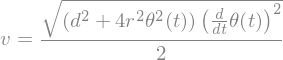

In [44]:
print_eq('v', v)

In [45]:
h = (r + d/2) * sm.cos(theta) + r * theta * sm.sin(theta)

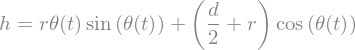

In [46]:
print_eq('h', h)

### Exercise

Look up the moment of inertia of a rectangle with respect to its geometric center (also it's center of mass under our uniformly dense assumption) and rotation about its longest axis:

https://en.wikipedia.org/wiki/List_of_moments_of_inertia

Create a symbolic expression in terms of our variables (see free body diagram) and assign it to the variable `I`.

**Note**: In Python use `**` to raise a value to a power, not `^`.

In [47]:
# write your answer here, I = ...

In [48]:
I = m / 12 * (d**2 + l**2)

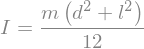

In [49]:
print_eq('I', I)

### Exercise

Write a symbolic expression for the sum of the translational and rotational kinetic energy and store it in the variable `T`.

In [50]:
# write your answer here, T = ...

In [51]:
T = m * v**2 / 2 + I * sm.diff(theta, t)**2 / 2

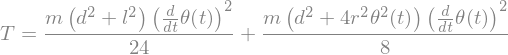

In [52]:
print_eq('T', T)

### Exercise

Write a symbolic expression for the potential energy and store it in the variable `U`.

In [53]:
# Write your answer here, U = ...

In [54]:
U = m * g * h

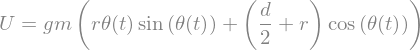

In [55]:
print_eq('U', U)

## Modeling Step 3: Form the equations of motion

The Newton-Euler equations of motion are in second order form, i.e. second time derivative of the angular position. We will need them to be in explicit first order form. To put the systems in to explicit first order form, we will need to introduce a new variable called a generalized speed. We define this variable as:

$$\omega = \frac{d\theta}{dt}$$

and it becomes the first of our two differential equations of motion.

In [56]:
omega = sm.Function('omega')(t)

The following function is a bit "magic" in the sense that all you know is that it takes the kinetic and potential energy and returns the equations of motion. We will learn how this happens further into the class.

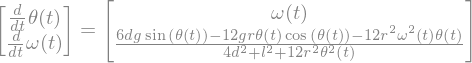

In [57]:
eom_in_first_order_form(T, U, theta, omega, t)

The above mathematical equation represents a set of **coupled explicit first order nonlinear ordinary differential equations**. The left hand side has the derivatives of the two state variables $\theta$ and $\omega$ and the right hand side are the expressions one can use to calculate the derivatives given the constants (mass, geometry, etc) and the state variables at a given instance of time.

This is a **mathematical model** that can predict the motion of the system and is derived from our conceptual model which is described with the **free body diagram**.

In [58]:
# write solution here

### Exercise

Write a Python function that computes the derivatives of the two **state variables**, $\theta$ and $\omega$. These expressions should come directly from the symbolic equations of motion we formed above.

```python
def rhs(theta, omega, d, l, r, g):
    thetadot = # write your expression here
    omegadot = # write your expression here
    return thetadot, omegadot
```

**Note**: Make sure to use NumPy functions because this should work with floating point numbers. You will likely need `np.sin()` and `np.cos()`. For example:

```python
np.sin(5.0)
```

In [59]:
# write answer here

In [60]:
def rhs(theta, omega, d, l, r, g):
    thetadot = omega
    omegadot = (6 * d * g * np.sin(theta) - 12 * g * r * theta * np.cos(theta) -
                12 * r**2 * omega**2 * theta) / (4 * d**2 + l**2 + 12 * r**2 * theta**2)
    return thetadot, omegadot

You can test your function to see if it computes with floating point numbers:

In [61]:
rhs(5.0, 2.1, 6.0, 7.0, 12.0, 9.8)

If you used all NumPy compatible functions it should also work with arrays:

In [62]:
rhs(5.0 * np.ones(2), 3.6 * np.ones(2), 6.0, 7.0, 12.0, 9.8)

(array([3.6, 3.6]), array([-2.63439331, -2.63439331]))

# Summary

In this notebook you:

- characterized the books motion by its simulated and real period of oscillation
- validated that the model matched reality and was a good predictor
- found the value of the radius, a design parameter, that governed good 

This is a simple of example of what you will be doing in this class. Real systems offer many more interesting dynamics and vibratory motion, especially when there is more than one moving part. We will work with a new system each couple of class periods and get deeper and deeper into the analysis, modeling, and design of vibrating mechanical systems.